# 4.9 Intro to Data Visualization with Python Part 2

### This script contains the following points:
#### 1. Import resources
#### 2. Create Bar Charts
#### 3. Create Histograms and Scatterplots
#### 4. Sampling Data
#### 5. Create a histogram of the “order_hour_of_day” column
#### 6. Create a bar chart from the “loyalty_flag” column
#### 7. Check the relationship between expenditure ('prices') and hour_of_the_day
#### 8. Create a line chart exploring age and number of dependents
#### 9. Explore the connection between age and spending power (income)

### 1. Import resources

In [1]:
# Import libs
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set a path variable for the import
path = r'C:\Users\zhoux\Documents\CF-Data Analyst Program\DA-Immersion\10-2023 Instacart Basket Analysis'

In [3]:
# Import data set
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_sub_customers.pkl'))

In [4]:
ords_prods_merge.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,avg_prods_price,spending_flag,median_days_since_prior_order,regularity_flag,gender,state,age,n_dependents,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,3,married,40423


### 2. Create Bar Charts

<Axes: xlabel='orders_day_of_week'>

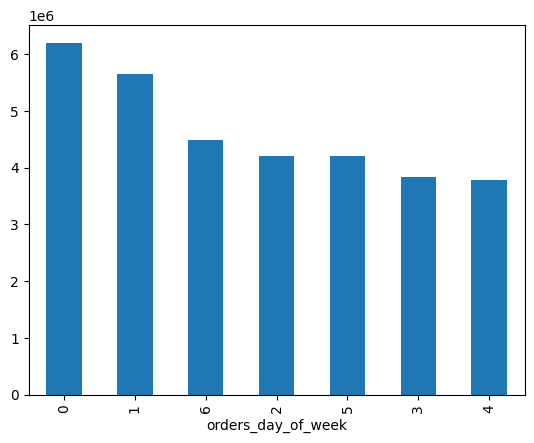

In [5]:
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

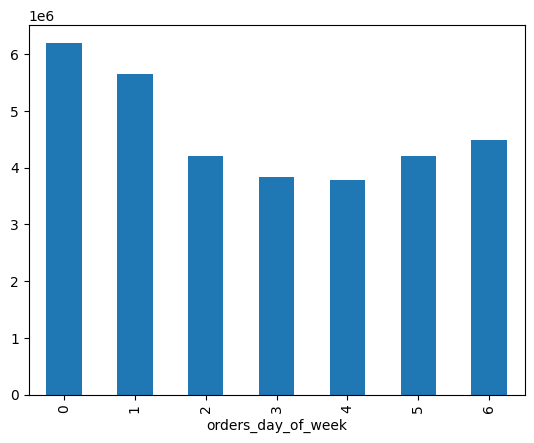

In [6]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [8]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

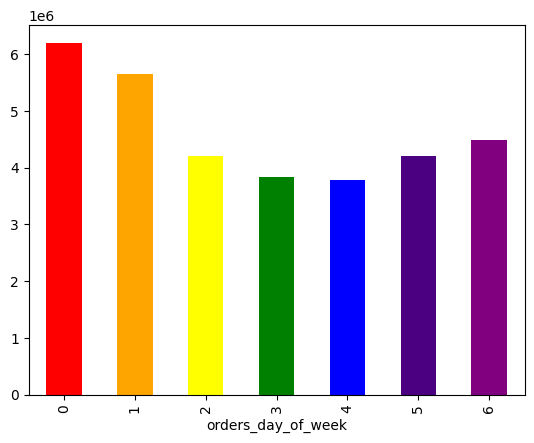

In [9]:
# add colors to the bar chart
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar(color = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'purple'])

In [10]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### 3. Create Histograms and Scatterplots

<Axes: ylabel='Frequency'>

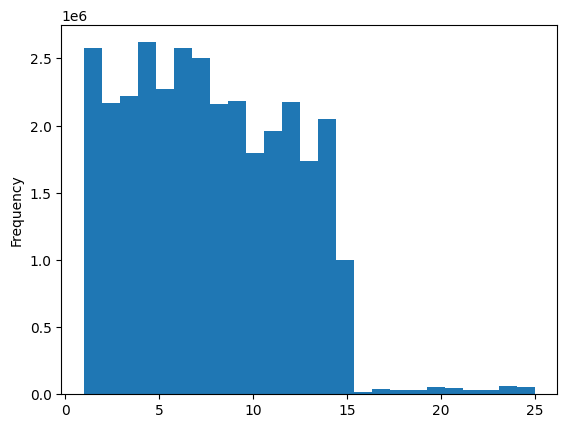

In [11]:
ords_prods_merge['prices'].plot.hist(bins = 25)

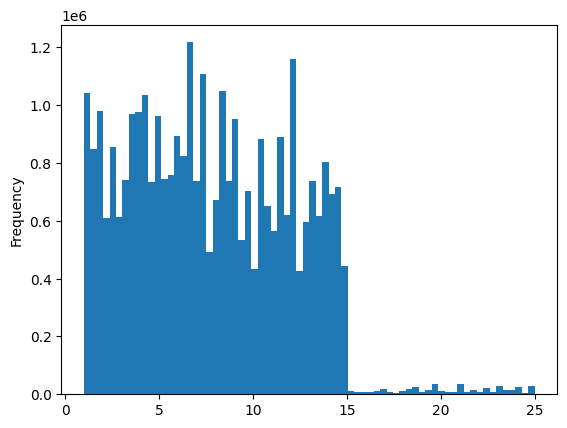

In [12]:
hist = ords_prods_merge['prices'].plot.hist(bins = 70)

In [13]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

### 4. Sampling Data

In [14]:
# Set the seed for the random number generator
np.random.seed(4)

In [15]:
# Create random numbers (the amount equals to the length of ords_prods_merge)
# Compare it to 0.7 and save the boolean results list 
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [16]:
# sample <= 0.7 (70% of all rows) are saved as the big df,
# sample >0.7 (30% of all rows) are saved as the small df.
big_2 = ords_prods_merge[dev]
small_2 = ords_prods_merge[~dev]

In [17]:
len(ords_prods_merge)

32404859

In [18]:
len(big_2) + len(small_2)

32404859

In [19]:
df_2 = small_2[['orders_day_of_week', 'prices']]
df_2.head()

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5


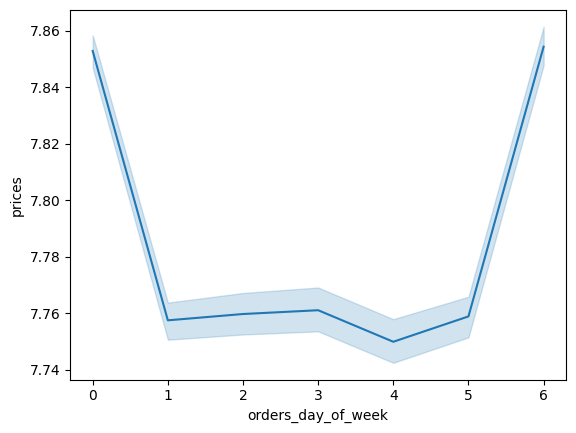

In [20]:
# Create the line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

In [21]:
# Export the chart
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices.png'))

### 5. Create a histogram of the “order_hour_of_day” column

Provide the senior stakeholders with descriptive findings about sales. 

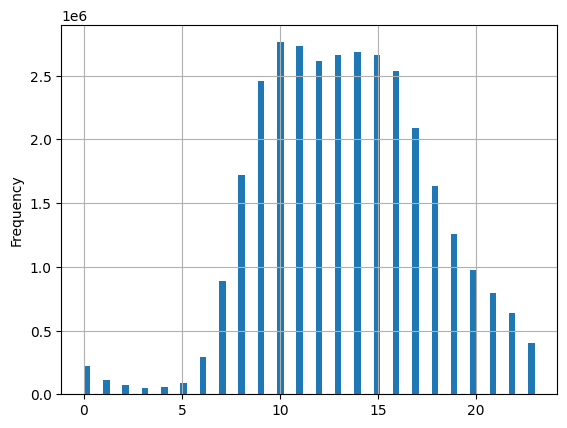

In [22]:
hist_ords_hr_of_day = ords_prods_merge['order_hour_of_day'].plot.hist(bins = 70, grid = True)

The histogram demonstrates that the most orders (frequency > 0.5 million)  tend to be made during 7am-11pm, with the peak (frequency > 2.5 million) being 9am-4pm. The company is growing, thus the orders happening at 9am could soon surpass 2.5 million. It makes more sense to count 9am as a peak hour.

In [23]:
# Export the chart
hist_ords_hr_of_day.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_ords_hr_of_day.png'))

### 6. Create a bar chart from the “loyalty_flag” column

The marketing team is curious about the distribution of orders among customers in terms of loyalty. 

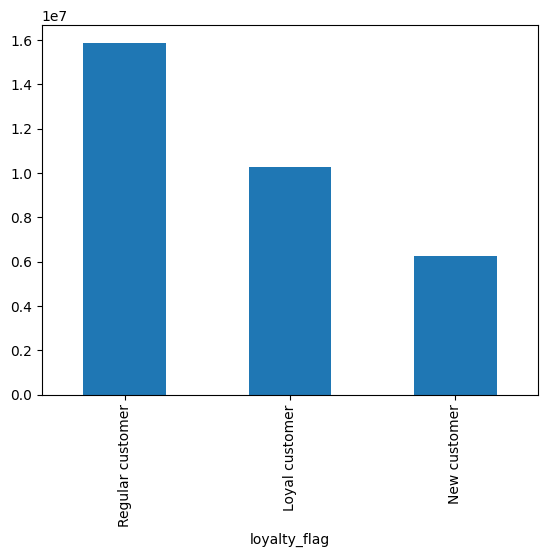

In [24]:
bar_loyalty = ords_prods_merge['loyalty_flag'].value_counts().plot.bar()

In [25]:
# Export the chart
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty.png'))

### 7. Check the relationship between expenditure ('prices') and hour_of_the_day

To check this, I need to use an accurate sample for the line chart.

In [26]:
# Set the seed for the random number generator
np.random.seed(4)

In [27]:
# Create random numbers (the amount equals to the length of ords_prods_merge)
# Compare it to 0.7 and save the boolean results list 
dev_2 = np.random.rand(len(ords_prods_merge)) <= 0.7

In [28]:
# sample <= 0.7 (70% of all rows) are saved as the big df,
# sample >0.7 (30% of all rows) are saved as the small df.
big = ords_prods_merge[dev_2]
small = ords_prods_merge[~dev_2]

In [29]:
len(ords_prods_merge)

32404859

In [30]:
len(big) + len(small)

32404859

In [ ]:
df_3 = small[['order_hour_of_day', 'prices']]

In [38]:
df_3.head()

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5


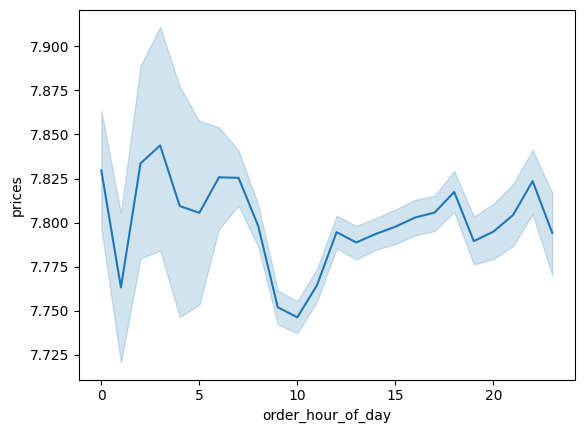

In [32]:
# Create the line chart
line_2 = sns.lineplot(x = 'order_hour_of_day', y = 'prices', data = df_3)

In [33]:
# Export the chart
line_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices_2.png'))

### 8. Create a line chart exploring age and number of dependents

Conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns.

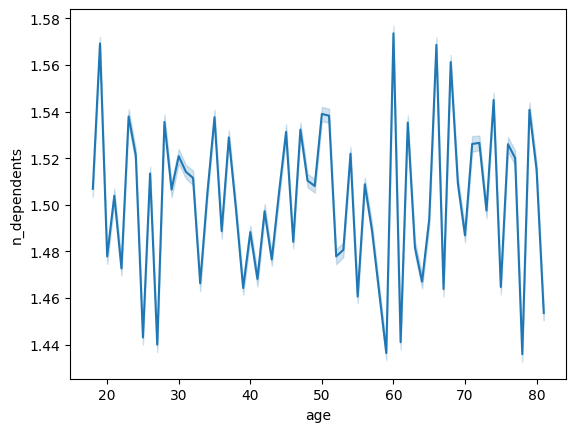

In [5]:
age_denpendents_line = sns.lineplot(data = ords_prods_merge, x = 'age',y = 'n_dependents')

This line chart might have something off. The n_dependents should be integers as shown below, since the values shows counts of people. But in the chart, n_dependents became floats between 1.44-1.58, which makes no sense. What is wrong?

In [39]:
ords_prods_merge['n_dependents'].value_counts()

n_dependants
3    8135109
0    8097503
2    8091143
1    8081104
Name: count, dtype: int64

In [43]:
ords_prods_merge.groupby('age')['n_dependents'].mean()

age
18    1.506877
19    1.569220
20    1.477862
21    1.503876
22    1.472731
        ...   
77    1.520101
78    1.435900
79    1.540763
80    1.515084
81    1.453574
Name: n_dependants, Length: 64, dtype: float64

It turns out that seaborn calculated the mean of 'n_dependents' in each age group and plotted it in the chart. The chart is correct. It shows a rather consistent n_dependents value (around 1.5) with no significant correlation to age.

In [35]:
# Export the chart
age_denpendents_line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_denpendents_line.png'))

### 9. Explore the connection between age and spending power (income)

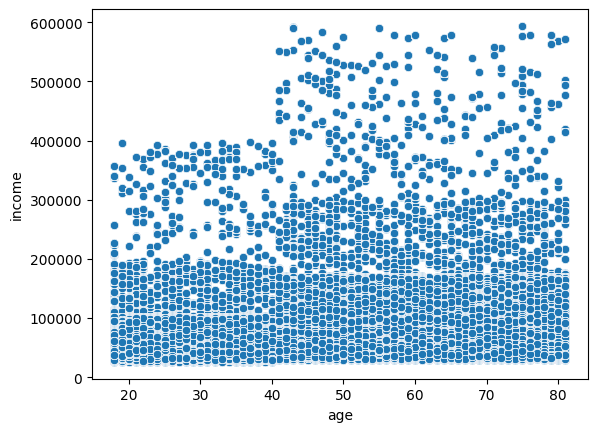

In [36]:
age_income_scatter = sns.scatterplot(x = 'age', y = 'income',data = ords_prods_merge)

The scatterplot shows that the majority between age 20-80 has an income below 200k. A small group of people between the age of 20-40 has an income between 200-400k, while nobody has an income >400k. From age 40, we observe a signifiant income rise, as a group of people has an income between 200-300k, a smaller group with income between 300-600k. The chart suggests that there is a correlation between age and income.

In [37]:
# Export the chart
age_income_scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income_scatter.png'))